In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df=pd.read_csv("/content/Trading-features (1).csv")
df

,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
0,55466910,43138.2,2023-12-27 12:47:41.916971,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
1,55466909,43138.2,2023-12-27 12:47:40.693372,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
2,55466908,43138.2,2023-12-27 12:47:39.968797,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
3,55466907,43138.2,2023-12-27 12:47:38.919784,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
4,55466906,43132.6,2023-12-27 12:47:37.881533,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,...,689.6,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55456903,42753.6,2023-12-27 10:00:09.874616,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9996,55456902,42753.6,2023-12-27 10:00:08.803069,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9997,55456901,42753.6,2023-12-27 10:00:07.957261,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9998,55456900,42753.7,2023-12-27 10:00:06.730827,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,...,440.3,-41.2,440.3,-41.2,-41.2,440.3,440.3,-41.2,-41.2,440.3


In [5]:
# df['shifted column']=df['last_price'].shift(-1)
# df['shifted column'].fillna(0)
# df['change']=(df['last_price']>df['shifted column']).astype(int)
# df.drop(['shifted column'],axis=1,inplace=True)
# df
df['shifted column']=df['last_price'].shift(-1)
df['change']=0
df.loc[df['last_price']>df['shifted column'],'change']=1
df.loc[df['last_price']<df['shifted column'],'change']=2
df.drop(['shifted column'],axis=1,inplace=True)
df

,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,...,f153,f154,f155,f156,f157,f158,f159,f160,f161,change
0,55466910,43138.2,2023-12-27 12:47:41.916971,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,...,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,0
1,55466909,43138.2,2023-12-27 12:47:40.693372,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,...,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,0
2,55466908,43138.2,2023-12-27 12:47:39.968797,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,...,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,0
3,55466907,43138.2,2023-12-27 12:47:38.919784,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,...,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,1
4,55466906,43132.6,2023-12-27 12:47:37.881533,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,...,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55456903,42753.6,2023-12-27 10:00:09.874616,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,...,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2,0
9996,55456902,42753.6,2023-12-27 10:00:08.803069,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,...,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2,0
9997,55456901,42753.6,2023-12-27 10:00:07.957261,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,...,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2,2
9998,55456900,42753.7,2023-12-27 10:00:06.730827,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,...,-41.2,440.3,-41.2,-41.2,440.3,440.3,-41.2,-41.2,440.3,2


In [6]:

df.describe()

,id,last_price,f1,f2,f3,f4,f5,f6,f7,f8,...,f153,f154,f155,f156,f157,f158,f159,f160,f161,change
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.546190e+07,42938.580560,0.000414,20149.80990,-40.236010,42.252370,2.016360,0.523120,1.103560,2.29049,...,-74.606490,533.201440,-74.606490,-74.606490,533.201440,533.201440,-74.606490,-74.606490,533.201440,0.945800
std,2.890879e+03,205.486455,0.000018,2897.95985,7.212493,9.346334,5.339766,12.883223,17.590602,24.03562,...,46.736091,177.929894,46.736091,46.736091,177.929894,177.929894,46.736091,46.736091,177.929894,0.834225
min,5.545690e+07,42659.500000,0.000397,15139.00000,-57.800000,15.000000,-27.100000,-51.900000,-59.900000,-75.70000,...,-196.300000,301.200000,-196.300000,-196.300000,301.200000,301.200000,-196.300000,-196.300000,301.200000,0.000000
25%,5.545940e+07,42747.400000,0.000400,17642.00000,-46.000000,35.700000,0.000000,-5.600000,-8.300000,-11.00000,...,-104.825000,359.100000,-104.825000,-104.825000,359.100000,359.100000,-104.825000,-104.825000,359.100000,0.000000
50%,5.546190e+07,42835.850000,0.000408,20146.00000,-38.200000,40.500000,0.800000,0.000000,0.100000,0.40000,...,-61.200000,450.800000,-61.200000,-61.200000,450.800000,450.800000,-61.200000,-61.200000,450.800000,1.000000
75%,5.546441e+07,43145.225000,0.000417,22652.25000,-34.500000,48.500000,3.900000,5.725000,8.800000,12.20000,...,-37.700000,712.325000,-37.700000,-37.700000,712.325000,712.325000,-37.700000,-37.700000,712.325000,2.000000
max,5.546691e+07,43262.000000,0.000463,25196.00000,-22.100000,124.200000,85.300000,135.000000,135.700000,179.00000,...,49.400000,831.300000,49.400000,49.400000,831.300000,831.300000,49.400000,49.400000,831.300000,2.000000


In [7]:
df["created_at"] = pd.to_datetime(df["created_at"], errors='coerce')
df['hour'] = df['created_at'].dt.hour
df['minute'] = df['created_at'].dt.minute
df['second'] = df['created_at'].dt.second
df

,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,...,f156,f157,f158,f159,f160,f161,change,hour,minute,second
0,55466910,43138.2,2023-12-27 12:47:41.916971,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,...,-123.8,695.2,695.2,-123.8,-123.8,695.2,0,12,47,41
1,55466909,43138.2,2023-12-27 12:47:40.693372,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,...,-123.8,695.2,695.2,-123.8,-123.8,695.2,0,12,47,40
2,55466908,43138.2,2023-12-27 12:47:39.968797,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,...,-123.8,695.2,695.2,-123.8,-123.8,695.2,0,12,47,39
3,55466907,43138.2,2023-12-27 12:47:38.919784,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,...,-123.8,695.2,695.2,-123.8,-123.8,695.2,1,12,47,38
4,55466906,43132.6,2023-12-27 12:47:37.881533,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,...,-129.4,689.6,689.6,-129.4,-129.4,689.6,0,12,47,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55456903,42753.6,2023-12-27 10:00:09.874616,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,...,-41.3,440.2,440.2,-41.3,-41.3,440.2,0,10,0,9
9996,55456902,42753.6,2023-12-27 10:00:08.803069,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,...,-41.3,440.2,440.2,-41.3,-41.3,440.2,0,10,0,8
9997,55456901,42753.6,2023-12-27 10:00:07.957261,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,...,-41.3,440.2,440.2,-41.3,-41.3,440.2,2,10,0,7
9998,55456900,42753.7,2023-12-27 10:00:06.730827,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,...,-41.2,440.3,440.3,-41.2,-41.2,440.3,2,10,0,6


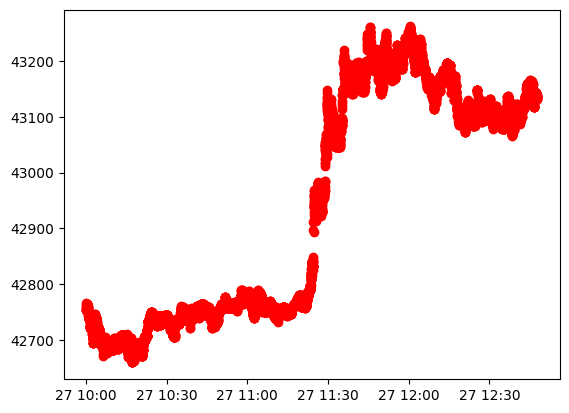

In [8]:
plt.scatter(df.created_at, df.last_price, label='Scatter Plot', color='Red', marker='o')

In [9]:
df.isnull().sum()
df.columns[df.isnull().sum() > 0].tolist()
df.fillna(df.mean(), inplace=True)

<ipython-input-9-33bf1f56b1bd>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


In [10]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [11]:
df.shape

(10000, 168)

In [12]:
x=df.drop(["last_price","created_at","id",'change'],axis=1)
x

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f155,f156,f157,f158,f159,f160,f161,hour,minute,second
0,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,-15.2,4.8,...,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,12,47,41
1,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,-15.2,4.7,...,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,12,47,40
2,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,-2.4,-6.7,4.7,...,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,12,47,39
3,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,-10.2,-12.3,-0.8,...,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,12,47,38
4,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,-10.2,-12.4,-0.9,...,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6,12,47,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,9.7,-23.7,-5.5,...,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2,10,0,9
9996,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,9.7,-21.5,-5.6,...,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2,10,0,8
9997,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,12.6,-21.4,-5.5,...,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2,10,0,7
9998,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,23.7,-9.6,3.0,...,-41.2,-41.2,440.3,440.3,-41.2,-41.2,440.3,10,0,6


In [13]:
y=df['change']
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    2
9998    2
9999    0
Name: change, Length: 10000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score_value = accuracy_score(y_test, y_pred)
print('score:', accuracy_score_value)

score: 0.4185


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
model=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_=accuracy_score(y_test,y_pred)
accuracy_

0.3325

In [16]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
# to reproduce some result for fellow ML Scientist
np.random.seed(1)
#creat Data
# x= heart_disease.drop("target",axis=1)
# y=heart_disease["target"]
# Split into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#instatiate SVC model
RFC_model= RandomForestClassifier()
RFC_model.fit(x_train,y_train)
# check the score model
RFC_model.score(x_test,y_test)

0.39

In [20]:
RFC_model.predict(x_test)[:5]


array([0, 0, 0, 0, 0])

In [21]:
RFC_model.predict_proba(x_test)[:5]

array([[0.8 , 0.2 ],
       [0.95, 0.05],
       [0.89, 0.11],
       [0.94, 0.06],
       [0.7 , 0.3 ]])